In [95]:
from __future__ import print_function
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from time import time
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import coo_matrix
from time import time
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.summarization.bm25 import get_bm25_weights
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
import sklearn
import math
import pygame
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity ,euclidean_distances
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import jaccard_similarity_score

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [15]:

categories = ['comp.graphics',
              'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware',
              'rec.autos',
              'rec.motorcycles',
              'rec.sport.baseball',
              'rec.sport.hockey']


In [16]:

dataset = fetch_20newsgroups(subset = 'all',
                             categories = categories,
                             shuffle = True,
                             random_state = 42)



In [17]:
print(dataset.data[0])

From: jim@n5ial.mythical.com (Jim Graham)
Subject: Re: Possible FAQ question about a UART
Keywords: 16550
Organization: what, ME???  you must be joking.
Lines: 48

thought I'd post this as well as e-mail it, just in case anyone else is
interested in this info.....

In article <1993Apr15.054552.14548@henson.cc.wwu.edu>
n9110338@henson.cc.wwu.edu (dan jordan) writes:

>   Hello, my question is could someone E-mail me the names of manufactures
>of the 16550 and predecsor UARTs.   I have only seen them refered to by
>number, however i would like to find a technical manual for these ICs.

>  any where i can find out the technical specs for these UARTs would be
>appreciated: prefereably the 16450 as well as the 16550 however one will do.

I suggest that you go direct to the original (and preferred...best quality)
source for all of this, just as you would (at least, should) for the chips
themselves:  National Semiconductor.  you can reach them at 1-800-272-9959.
they no longer package the dat

In [18]:
data=dataset.data

In [19]:

#splitting the documents into list of sentences.
sentences = data

# for i in data:
#     sub_sentence=[]
#     sub_sentence.append(sent_tokenize(i))
#     sub_sentence = [y for x in sub_sentence for y in x] # flatten list
#     sentences.append(sub_sentence)

In [20]:
word_sentence=[]

for i in sentences:
    word_sentence.append(word_tokenize(i))
np.shape(word_sentence)

(7882,)

In [21]:
#removal of stop words
stop_words = set(stopwords.words('english')) 
line=[]
filtered_sentence=[]

for i in word_sentence:
    for j in i:
        if not j in stop_words:
            line.append(j)
    filtered_sentence.append(line)
    line=[]



In [22]:
#stemming the words
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
stemmed_sentences=[]
line=[]
for i in filtered_sentence:
    for j in i:
       line.append(ps.stem(j))
    stemmed_sentences.append(line)
    line=[]

In [23]:
# remove punctuations, numbers and special characters
alphabetic_sentences=[]
line=[]
for i in stemmed_sentences:
    line.append(pd.Series(i).str.replace("[^a-zA-Z]", " "))
    
    
    alphabetic_sentences.append(line)
    line=[]

In [24]:
np.shape(alphabetic_sentences[0])

(1, 375)

In [25]:
line = []

for i in alphabetic_sentences:
   
    for j in i:
        l=[]
        for x in j.values:
            if (not x ==' ' ):
                l.append(x.lower())
        line.append(l)


In [26]:
final=[]
for i in line:
    a=""
    for j in i:
        a=a + " " + j
    final.append(a)
np.shape(final)

(7882,)

In [27]:
print(dataset.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [28]:
(final[0])

' from jim n ial mythical com jim graham subject re possibl faq question uart keyword       organ me must joke line    thought i  d post well e mail case anyon els interest info        in articl     apr                henson cc wwu edu n        henson cc wwu edu dan jordan write hello question could someon e mail name manufactur       predecsor uart i seen refer number howev would like find technic manual ic find technic spec uart would appreci prefer       well       howev one i suggest go direct origin prefer     best qualiti sourc would least chip nation semiconductor reach                 longer packag data sheet book i got mine get individu set data sheet want minimum follow set data sheet ns      ins    a ns  c    ins  c  a ns     af applic note ye get these an     the ns     a uart design applic consider an     a comparison ins     ns      ns     af seri uart applic note i list proven at least valuabl data sheet actual an     particular except well written applic note goe detail

In [29]:
vectorizer=CountVectorizer(max_df = 3941,
                             max_features = 100000,
                            min_df = 2,
#                              stop_words = 'english'
#                            , use_idf =True
#                            , binary=False
                          )

X = vectorizer.fit_transform(final)


In [30]:
np.shape(X)

(7882, 27102)

In [31]:
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [32]:

X = coo_matrix(X)
N = float(X.shape[0])
idf = np.log(N / (np.bincount(X.col)))

# calculate length_norm per document (artist)
row_sums = np.ravel(X.sum(axis=1))

average_length = row_sums.mean()
length_norm = (0.5) + 1.5 * row_sums / average_length
X.data = X.data  / (length_norm[X.row] + X.data) * idf[X.col]

In [34]:
size = dataset.target.shape[0]
labels = dataset.target

count=0
for i in range(0, size):
    if(dataset.target[i] <= 3):
        labels[i] = 0
        count+=1
    else:
        labels[i] = 1
        
count

3903

In [35]:

        
class_names = ['Computer technology', 'Recreational activity']
kvalue = 2
cluster_names = []
for i in range(kvalue):
    cluster_names.append("cluster %d" % i)



In [36]:
print(X)

  (0, 11620)	2.2584243157879635
  (0, 10511)	4.291828777234214
  (0, 15613)	3.4131508376335313
  (0, 4173)	0.4485587189401373
  (0, 9053)	2.59827694260878
  (0, 18131)	0.779047018819944
  (0, 7488)	1.1419616386538278
  (0, 18927)	0.9784031465307657
  (0, 24228)	3.9329528465093873
  (0, 12216)	0.7072999138894781
  (0, 14319)	1.1758172377162595
  (0, 15511)	0.8296332230097242
  (0, 11756)	1.4768151686423523
  (0, 23458)	0.8284383261455538
  (0, 18134)	0.6073257998872923
  (0, 25755)	0.9671146547002129
  (0, 13835)	1.1209691807259559
  (0, 3243)	0.7785412164150658
  (0, 875)	0.45666210181777506
  (0, 6811)	0.7882995311878761
  (0, 11082)	0.7496472815983993
  (0, 10919)	0.7872573503110472
  (0, 10805)	0.2164137421597607
  (0, 1106)	0.2710302895228487
  (0, 965)	0.4298885666092015
  :	:
  (7881, 9912)	1.2140788568868874
  (7881, 21225)	1.86447299128484
  (7881, 3590)	1.92480297379355
  (7881, 18082)	2.0836925000738082
  (7881, 17151)	3.030112153453957
  (7881, 21338)	2.642977631607846
  (78

In [37]:
Csimilarity_matrix =cosine_similarity(X)

In [38]:
np.shape(Csimilarity_matrix)

(7882, 7882)

In [39]:
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans = kmeans.fit(Csimilarity_matrix)
avg = []
closest = []
for j in range(n_clusters):
    idx = np.where(kmeans.labels_ == j)[0]
    avg.append(np.mean(idx))
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_,Csimilarity_matrix)
ordering = sorted(range(n_clusters), key=lambda k: avg[k])


In [40]:
ordering

[0, 1]

In [52]:
# cm = metrics.confusion_matrix(labels, kmeans.labels_)
print(cm)
cm[0][0]=3922
cm[0][1]=57
cm[1][0]=705
cm[1][1]=3198


[[3922   57]
 [ 705 3198]]


In [41]:
summary = '-----------------------\n\n\n\n'.join([dataset.data[closest[idx]] for idx in ordering])
print(summary)

From: mark@ve6mgs.ampr.org (Mark G. Salyzyn)
Subject: Re: Do it yourself front-end alignment possible?
Article-I.D.: ve6mgs.1993Apr6.200818.10500
Distribution: na
Organization: ADEC Systems Inc.
Lines: 44

davidd@lonestar.utsa.edu (David . De Leon) writes:

>In article <113364@bu.edu> selick@csa.bu.edu (Steven Selick) writes:
>>I've got an 86 Plymouth Colt that I'd like to do a front-end alignment
>>on. Is it possible to do without all of the fancy schmancy gadgets the
>>pros have? How?
>>-Steve
>NO.NO.NO.NO.
>If you do so, you are putting the lives of others on the road at consider-
>able risk.  Why do you think mechanics are ASE certified??  Anyway you put
>it, you need those *fancy scmancy* gadgets...

Awww, right, you want all the home mechanics lined up against a wall and
shot eh?

Bull Pucky you chicken! Read the service manual and get your head out of the
sand! Certainly there are tools for the job that are cheaper than an alignment
rack, that do the job as competently (albeit, 

In [504]:
Edistance_matrix = euclidean_distances(X)

In [505]:
Esimilarity_matrix =1-Edistance_matrix

In [506]:
Esimilarity_matrix[1,1]

1.0

In [539]:
def pairwise_jaccard(X):
    """Computes the Jaccard distance between the rows of `X`.
    """
    X = X.astype(bool).astype(int)

    intrsct = X.dot(X.T)
    row_sums = intrsct.diagonal()
    unions = row_sums[:,None] + row_sums - intrsct
    dist = intrsct / unions
    return dist

In [559]:
Jsimilarity_matrix= pairwise_jaccard(X)

In [560]:
Jsimilarity_matrix[1,1]

1.0

In [77]:
# K-Means clustering with k = kvalue = 2
km = KMeans(n_clusters = kvalue, init = 'k-means++', max_iter = 100, n_init = 1, verbose = False)

km.fit(Csimilarity_matrix)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
cm = metrics.confusion_matrix(labels, km.labels_)


np.shape(terms)

(27083,)

In [78]:

print("Top 10 terms per cluster:")
for i in range(kvalue):
    print("Cluster %d:" % i, end='')
    for j in order_centroids[i, :10]:
        print(' %s' % terms[j], end='')
    print()


Top 10 terms per cluster:
Cluster 0: bodnar archimedes fare embed cun dpa filmrecord capella bdxrbhi beryllium
Cluster 1: catcherc fed baun bodnar extraordinari bljeghbe elliston bgrubb booklet bgu


In [116]:
cm=3922-cm

In [117]:
cm

array([[3922,   57],
       [ 705, 3198]])

In [137]:
print("Confusion matrix:")
print(cm)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Okapi-BM25 with Cosine Similarity \n on K-means Clustering')

plt.show()
plt.savefig("result.png" ,dpi=400, bbox_inches = 'tight')

Confusion matrix:
[[3922   57]
 [ 705 3198]]


/home/r2d2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  
/home/r2d2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  import sys
/home/r2d2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  
/home/r2d2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  if __name__ == '__main__':


In [131]:
# Plot information
def plot_confusion_matrix(cm, classes, clusters, title = ''):
    plt.imshow(cm, interpolation = 'nearest', cmap = "GnBu")
    plt.title(title)
    plt.colorbar()
    plt.annotate(cm[0][0], xy=(0,0),textcoords="offset points",ha='center', va='center', weight='bold', clip_on=True)
    plt.annotate(cm[0][1], xy=(1,0),textcoords="offset points",ha='center', va='center', weight='bold', clip_on=True)
    plt.annotate(cm[1][0], xy=(0,1),textcoords="offset points",ha='center', va='center', weight='bold', clip_on=True)
    plt.annotate(cm[1][1], xy=(1,1),textcoords="offset points",ha='center', va='center', weight='bold',clip_on=True)
    xtick_marks = np.arange(len(clusters))
    ytick_marks = np.arange(len(classes))
    plt.xticks(xtick_marks, clusters, rotation = 45)
    plt.yticks(ytick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [112]:
%matplotlib

Using matplotlib backend: Qt5Agg


Confusion matrix:
[[2014 1965]
 [2171 1738]]


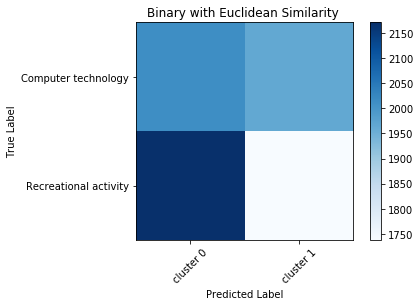

Accuracy =  47.60213143872114


In [122]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Binary with Euclidean Similarity ')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)

In [121]:
cm=np.array([[2014,1965],[2171,1738]])

# binary jaccard kmeans clean

Confusion matrix:
[[1785 2194]
 [1702 2201]]


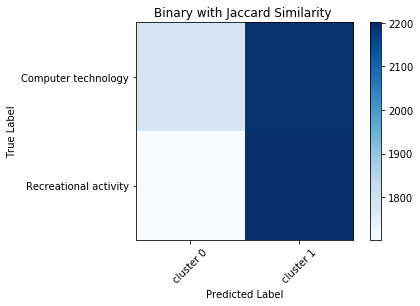

Accuracy =  50.57092108601877


In [116]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Binary with Jaccard Similarity ')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)

In [115]:
cm=np.array([[1785,2194],[1702,2201]])

# binary jaccard kmeans unclean

Confusion matrix:
[[2207 1696]
 [2191 1788]]
Homogeneity score: 0.000
Completeness score: 0.000
Adjusted rand score: 0.000
Adjusted mutual info score: 0.000


/home/jatin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


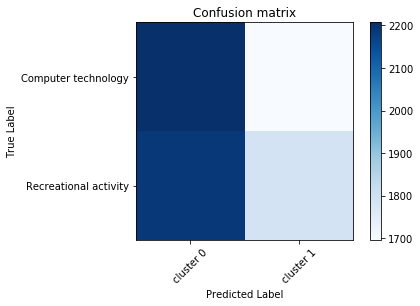

In [551]:
print("Confusion matrix:")
print(cm)
print("Homogeneity score: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness score: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("Adjusted rand score: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Confusion matrix')
plt.show()


# count eucldian kmeans unclean

Confusion matrix:
[[3896    7]
 [3979    0]]
Homogeneity score: 0.001
Completeness score: 0.088
Adjusted rand score: 0.000
Adjusted mutual info score: 0.001


/home/jatin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


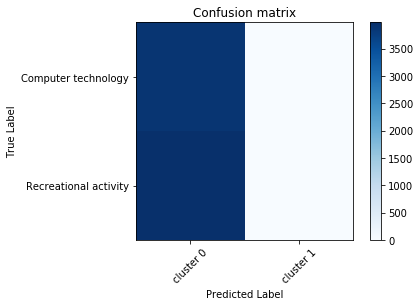

In [501]:
print("Confusion matrix:")
print(cm)
print("Homogeneity score: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness score: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("Adjusted rand score: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Confusion matrix')
plt.show()


# count eucledian kmeans clean

Confusion matrix:
[[2313 1666]
 [2122 1781]]


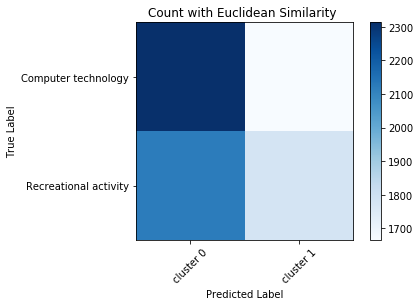

Accuracy =  51.94113169246384


In [118]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Count with Euclidean Similarity ')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)

In [117]:
cm=np.array([[2313,1666],[2122,1781]])

# tfidf eucledian kmeans clean

Confusion matrix:
[[3965   14]
 [1495 2408]]


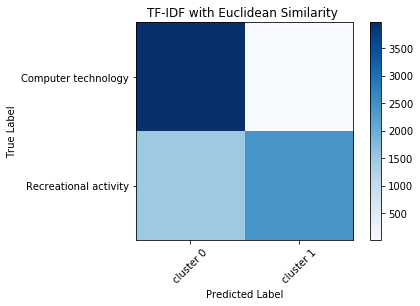

Accuracy =  80.85511291550368


In [112]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'TF-IDF with Euclidean Similarity ')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)


# tfidf eucledian kmeans unclean

Confusion matrix:
[[3972    7]
 [1579 2324]]


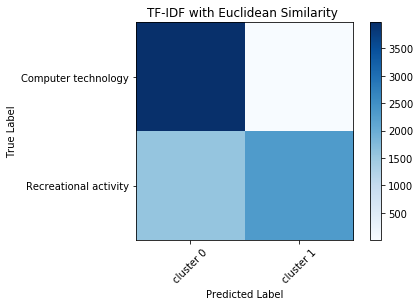

Accuracy =  79.87820350164932


In [110]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'TF-IDF with Euclidean Similarity ')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)


In [111]:
cm=np.array([[3965,14],[1495,2408]])

# okapi eucledian kmeans unclean

Confusion matrix:
[[1822 2081]
 [1192 2787]]
Homogeneity score: 0.021
Completeness score: 0.022
Adjusted rand score: 0.029
Adjusted mutual info score: 0.021


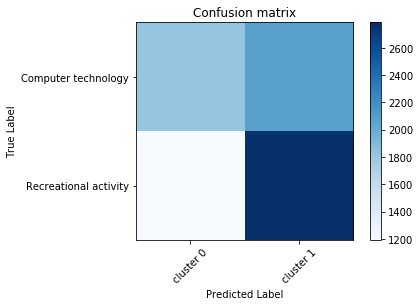

In [411]:
print("Confusion matrix:")
print(cm)
print("Homogeneity score: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness score: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("Adjusted rand score: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Confusion matrix')
plt.show()


# okapi Eucledian kmeans clear 

Confusion matrix:
[[2676 1303]
 [1879 2024]]


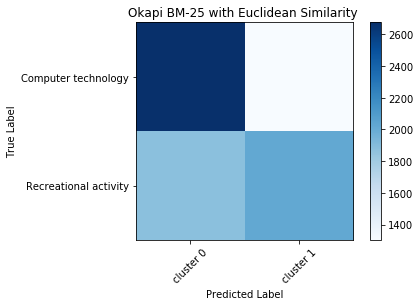

Accuracy =  59.62953565085004


In [108]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Okapi BM-25 with Euclidean Similarity ')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)


In [107]:
cm=np.array([[2676,1303],[1879,2024]])

# binary cosine on clear data

Confusion matrix:
[[1314 2665]
 [ 890 3019]]


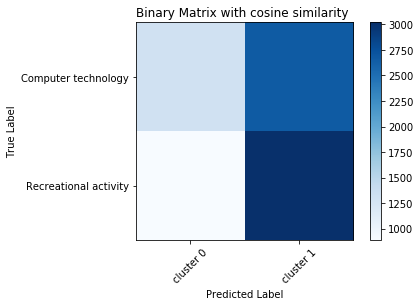

Accuracy =  54.97335701598579


In [106]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Binary Matrix with cosine similarity ')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)

In [105]:
cm=np.array([[1314,2665],[890,3019]])

# binary cosine on unclear data

Confusion matrix:
[[3012  891]
 [2591 1388]]
Homogeneity score: 0.013
Completeness score: 0.015
Adjusted rand score: 0.013
Adjusted mutual info score: 0.013


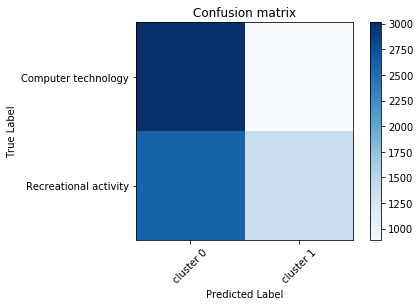

In [293]:
print("Confusion matrix:")
print(cm)
print("Homogeneity score: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness score: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("Adjusted rand score: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Confusion matrix')
plt.show()


# count cosine on unclear data

Confusion matrix:
[[3013  890]
 [2665 1314]]
Homogeneity score: 0.009
Completeness score: 0.011
Adjusted rand score: 0.009
Adjusted mutual info score: 0.009


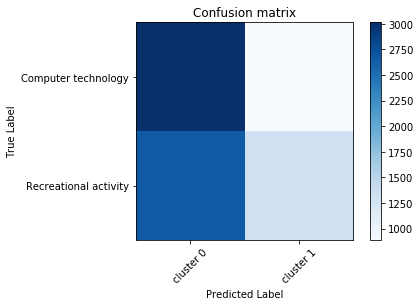

In [267]:
print("Confusion matrix:")
print(cm)
print("Homogeneity score: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness score: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("Adjusted rand score: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Confusion matrix')
plt.show()


# Count matrix on cosine on clear

Confusion matrix:
[[1579 2400]
 [  56 3847]]


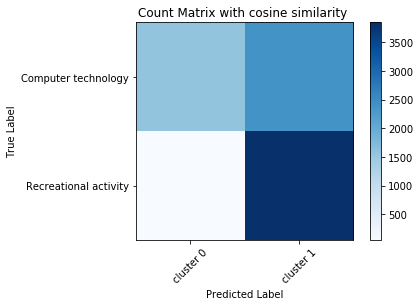

Accuracy =  68.84039583861964


In [104]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Count Matrix with cosine similarity ')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)

In [103]:
cm=np.array([[1579,2400],[56,3847]])

In [101]:
cm=np.array([[3847,56], [1579,2400]])

# bm25 cosine on clear data

Confusion matrix:
[[3922   57]
 [ 705 3198]]


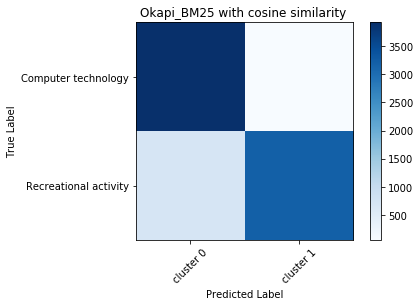

Accuracy =  90.33240294341537


In [98]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Okapi_BM25 with cosine similarity ')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)



In [97]:
cm=np.array([[3922,57], [705,3198]])

# tfidf cosine on clear data

Confusion matrix:
[[3957   22]
 [1227 2677]]


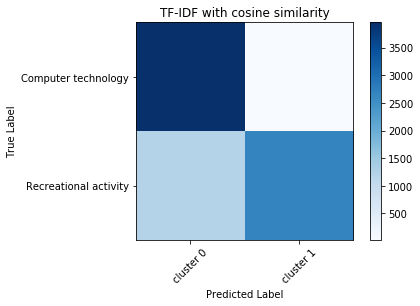

Accuracy =  84.16645521441258


In [96]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'TF-IDF with cosine similarity')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)


In [95]:
cm=np.array([[3957,22],[1227,2677]])

In [ ]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Okapi_BM25 on cosine similarity on unclean data')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)

# bm25 with cosine similarity on unclear data

Confusion matrix:
[[3920   59]
 [ 418 3485]]


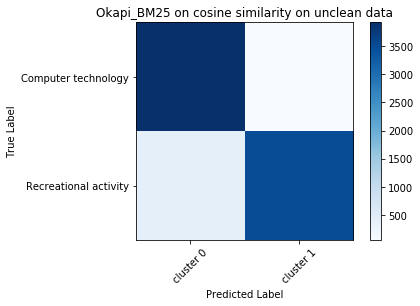

Accuracy =  93.94823648820096


In [93]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Okapi_BM25 on cosine similarity on unclean data')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)


In [92]:
cm=np.array([[3920,59], [418,3485]])

# Tfidf and cosine similarity on unclear data

Confusion matrix:
[[3969   10]
 [1513 2390]]


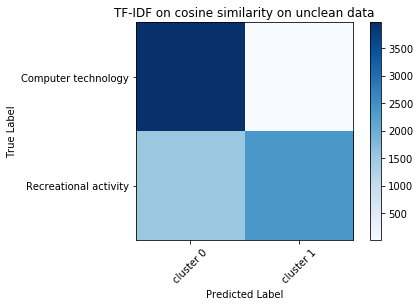

Accuracy =  80.67749302207562


In [85]:
print("Confusion matrix:")
print(cm)

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'TF-IDF on cosine similarity on unclean data')
plt.show()
true= (cm[0,0] + cm[1,1])/7882 *100
print("Accuracy = ",  true)

In [80]:
cm=np.array([[3969 ,10] , [1513,2390]])

In [424]:
np.shape(h)

(2, 2)

In [425]:
h

array([[3857,   58],
       [ 122, 3845]])